# Time-Dependence in the Infinite Potential Well

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Define a Few Constants

In [2]:
# width of the well in a.u. (i.e. 1 bohr radius)
L = 1 

# length of arrays
xmax = 500

# setting the energy level that we want to simulate
num = 4

## Eigenfunctions of potential well

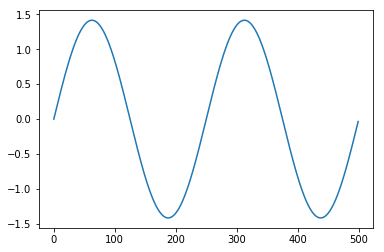

In [3]:
def eigenfunction(n, length):
    
    wav = np.empty(length) # creating an empty array 
    
    for x in np.arange(0, length):
        wav[x] = np.sqrt(2 / L) * np.sin(n * np.pi * x / length)
        
    return wav

plt.plot(eigenfunction(num, xmax))

## Animation Function

In [4]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib) each time this is called, 
    it will replot the plotting objects with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    energy = ((num * np.pi)**2)/(2*L)
    
    # sets y-data data for plotting
    f = eigenfunction(num, xmax) * np.exp(-1j * energy * np.pi**2  * t) 
    
    wave_real.set_ydata(f.real)
    wave_imag.set_ydata(f.imag)
    prob.set_ydata(f * conj(f))

## Creating the animation

<IPython.core.display.Javascript object>


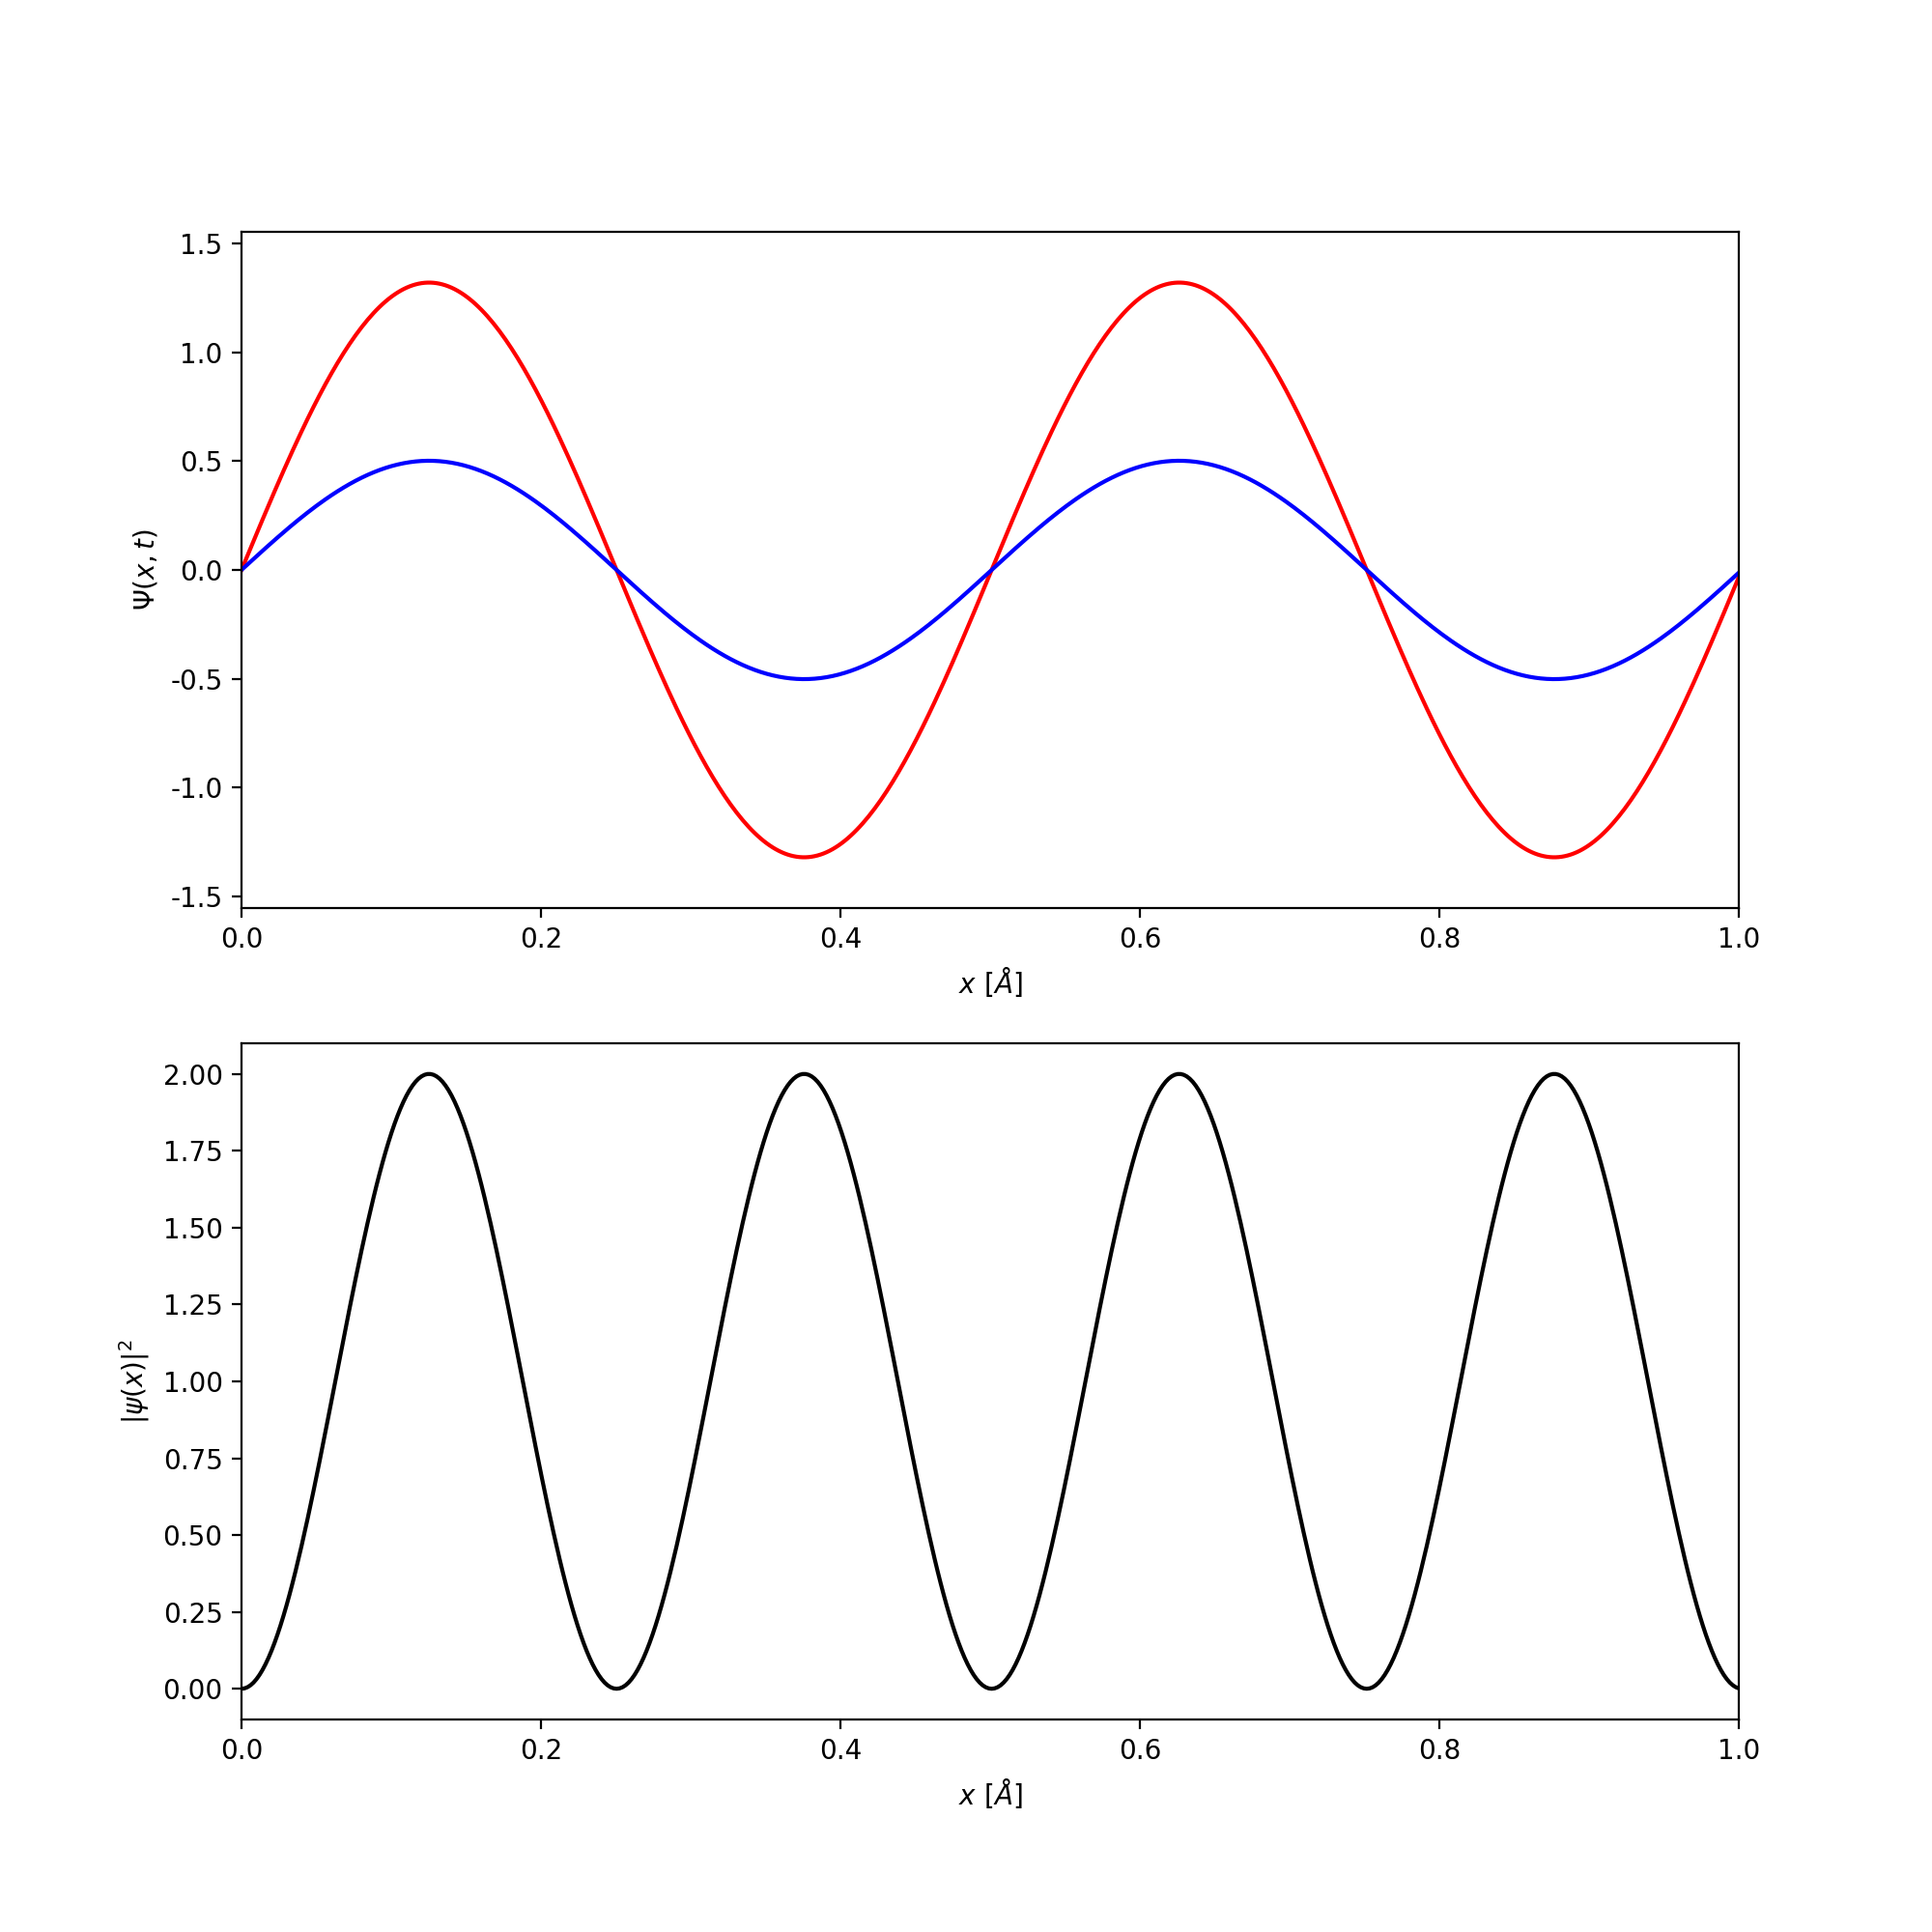

In [5]:
# required to display animated plots
%matplotlib notebook

# array of x values for plotting
xvals = np.linspace(0, 1, xmax)

# create figure and axes object
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10)) 

# draw the first frame of the animation on our plots
wave_real, = ax1.plot(xvals, eigenfunction(num, xmax),'-r') 
wave_imag, = ax1.plot(xvals, eigenfunction(num, xmax),'-b') 
prob, = ax2.plot(xvals, eigenfunction(num, xmax)**2, '-k') 




def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real, wave_imag, prob : the objects that will appear on our plots and be called by the animate function
    
    """

    plt.rcParams.update({'font.size': 14})
    plt.rc('text', usetex=True) 
    ax1.set_xlabel(r'$x \ [\AA ]$')
    ax1.set_ylabel(r'$\Psi(x, t)$')
    ax2.set_xlabel(r'$x \ [\AA ]$')
    ax2.set_ylabel(r'$|\psi(x)|^2$')
    ax1.set_xlim(0, 1)
    ax2.set_xlim(0, 1)

    return wave_real, wave_imag, prob



# the FuncAnimation function iterates through our animate function using the steps array
step = 0.0001 # stepsize  
steps = np.arange(0, 200, step)

# our animation
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=25, blit=True) 

plt.show()